# Computing a persistence diagram using scikit-tda
In this tutorial, we will discuss how to compute a persistence diagram using scikit-tda.
Persistence diagram is a tool to measure any high dimensional data in terms of its shape. In particular this tool can be used to compute number of connected compoenents, loops if any and voids.

Interested reader can have a look at the following video for an intutive explanation of what persistence diagram is: [Video](https://www.youtube.com/watch?v=2PSqWBIrn90)

NOTE :  Exact mathematical details of the computations are out of the scope of this notebook. Users are referred to the following papers or books for a more concrete undrestadning of the concepts:
1. [Computational Topology by Edelsbrunner & Harer:](https://g.co/kgs/zS7A8h)
2. [An Introduction to Topological Data Analysis for Physicists:](https://arxiv.org/pdf/1904.11044.pdf)

You can install the package using:
```
pip install scikit-tda
```
More details can be found at [Installation](https://github.com/scikit-tda/scikit-tda). It works with >python 3.7.
Installation of pakcages such as matplotlib, numpy, scipy is assumed.


In [6]:
# Import the following packages from scikit-tda
from ripser import ripser
from persim import plot_diagrams
import tadasets

# Following are standard python packages
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib as mpl
import sys
sys.path.append('../')

data is of the size: [200 2]


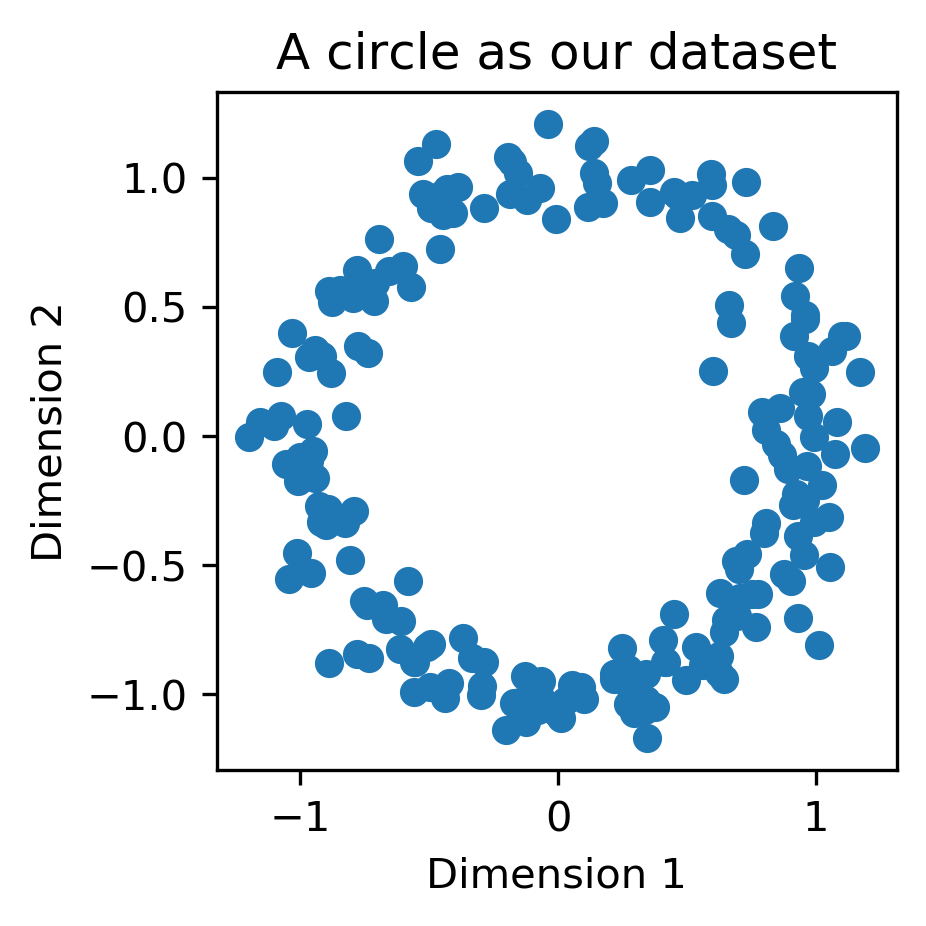

In [2]:
# We showcase the usage of scikit-tda on a simple data set consisting of a noisy cycle. 
# One can count that there is one connected compoenent and one cycle.

# We first create the dataset and visualize the cycle in two dimensions

t = tadasets.dsphere(n=200, d=1, r=1.0, noise=0.1)
print('data is of the size: [%d %d]' %(np.shape(t)[0],np.shape(t)[1]))

%matplotlib inline
mpl.rcParams['figure.dpi']= 300
plt.figure(figsize=(3, 3))

plt.scatter(t[:,0],t[:,1])
plt.title('A circle as our dataset')
plt.tight_layout()
plt.xlabel('Dimension 1', fontsize=10)
plt.ylabel('Dimension 2', fontsize=10)
plt.show()


From the above 2D plot of our data, we can see that data has been sampled from a circle although it has some noise.

We verify that the dataset created in `t` has one connected compoenent and a loop as in its global structure. 

Persitence allows one to identify the global topological features.

The topological features that define data shape from which it is sampled from are 1)number of connected components 2) loops and its higher dimensional counter parts.

In computational topology, these are defined using `homology` groups. Intuitively, homology groups 

The computaton involves the following:
1. We first express the point cloud data set in the form of simplicies by increasing the distance parameter.  
2. The simplices are then paired with an youngest simplex of the same order and the time of pairing (in terms of distance) is noted.
3. The distance at which a pairing for a simplex occured is noted as a `death time` and the distance at which a simplex is formed is noted as a `birth time`.
4. The 2D plot of `birth time` vs `death time` is referred as a `persistence diagram`. The diagram tells us which topological features persists. The features of topology of data is computed in terms of connected components, loops and voids often referred as $H_0, H_1, H_2$ respectively.   

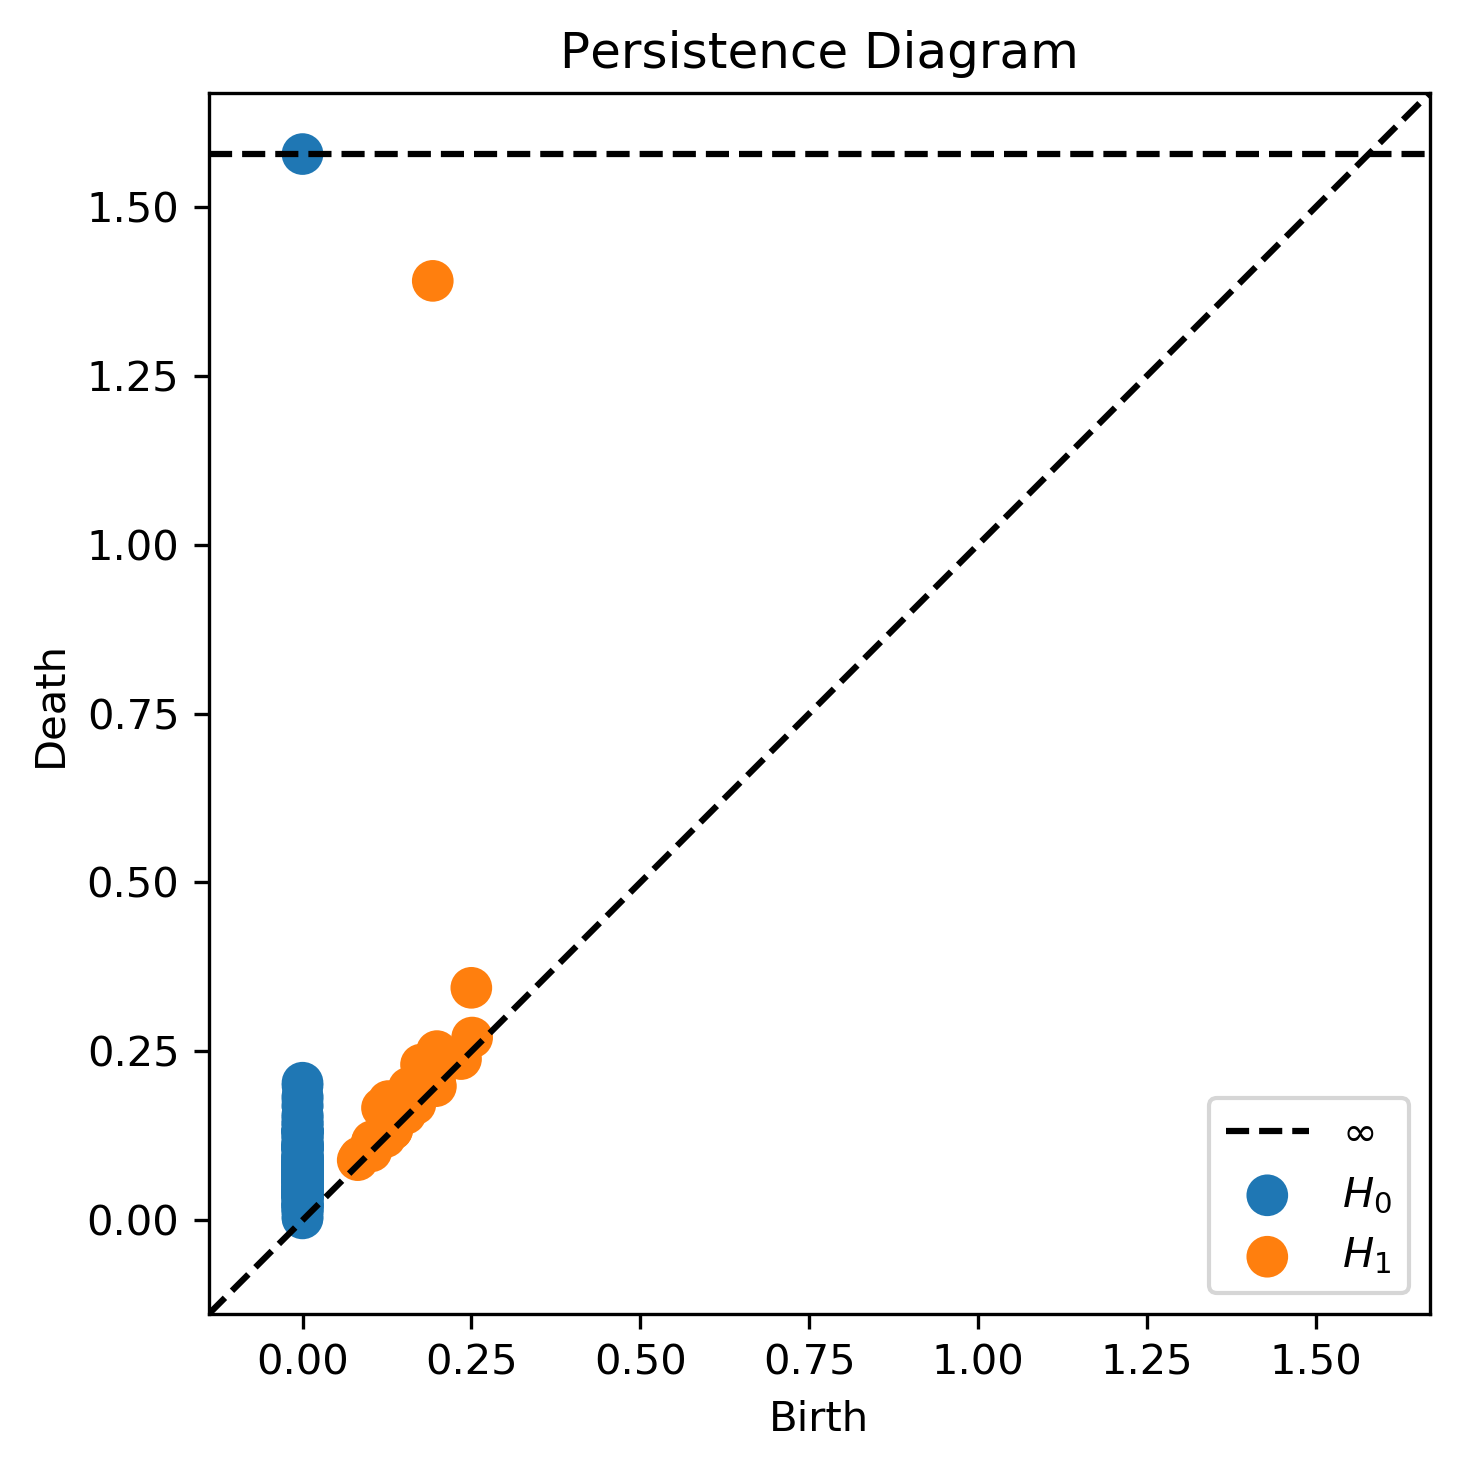

In [3]:
# The following piece of code cretaes the a persitence for the data in t

# We first compute a pairwise distance matrix of the data using euclidean distance
dist = squareform(pdist(t, 'euclidean'))

# Use the distance matrix to compute a Vetoris-Rips filtration and compute persistence diagram
dgm = ripser(dist, distance_matrix=True)['dgms']

# Plot the computed persistence diagram alongside the point cloud data set of noisy circle
%matplotlib inline
mpl.rcParams['figure.dpi']= 300

plt.figure(figsize=(5, 5))
plot_diagrams(dgm, show=False, size=100)
plt.title("Persistence Diagram")
plt.tight_layout()
plt.show()

As can be seen on the persistence diagram, we see two points (blue and orange) that have large persistence (vertical distance between the point and diagonal line).

These two points measure the point cloud to have a connected component (blue dot) and one cycle (orange dot). All other points in the persistence diagram have very small persistence (life time) and do not contribute to the measurement of point cloud.

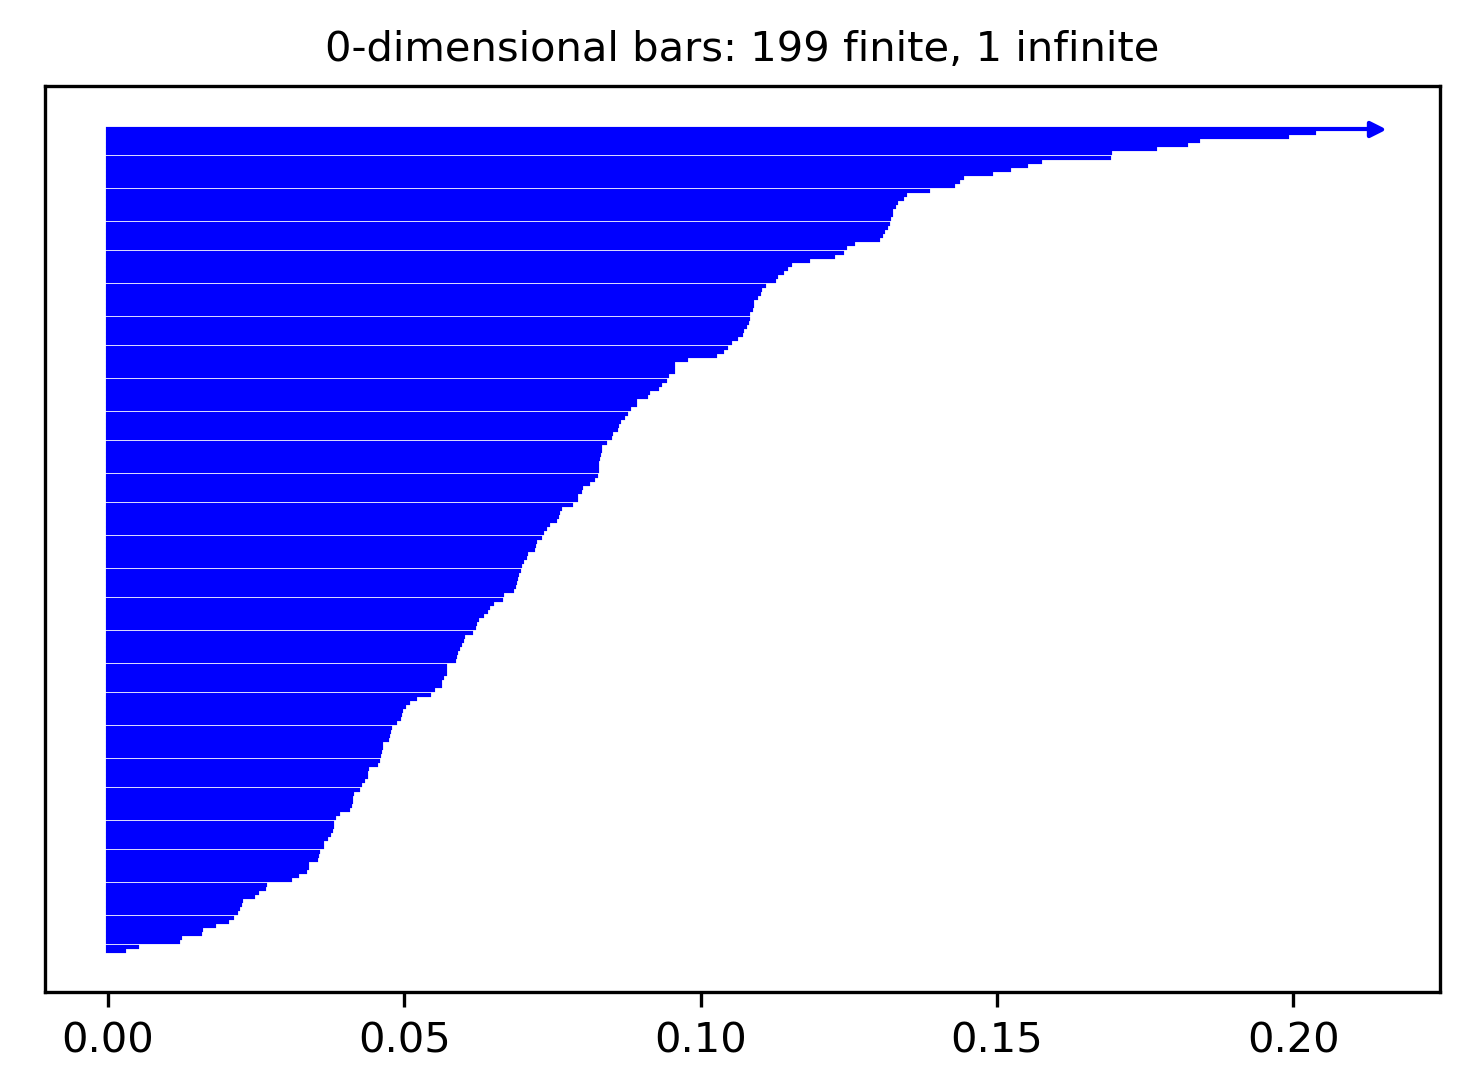

In [7]:
# The following piece of code is provided as a helper function to plot a barcode
# which is just a fancy version of the above persistence diagram.
# In practice you'll find useful to work with the persistence diagram instead
from helpers.visuals_computational_topology import plot_barcode
%matplotlib inline
mpl.rcParams['figure.dpi']= 300
plot_barcode(dgm,dimensions=0)


A barcode has the similar interpreation as a persitence diagram. On the y-axis you have all the relevant dimensiona simplicies evolved over time and on x-axis time used to compute a filtration are noted. A bar starts at the time of `birth` of any simplex and ends at the time of `death`. If you slice the bar code at any given time (i.e. a vertical line at any given time), you can find all the simplicies that are alive. For example, if you are looking at 0-dimensional barcode, you can count number of connected components at that particualr time and number of cycles(loops) for 1-dimensional. I would definetely have a soft vote for using the persistence diagram than a barcode.